# 目录

+ 数据清洗
+ 数据探索
+ 特征工程
+ 模型与评估
+ 参数调整
+ 集成方法

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
# combine train and test set.
train=pd.read_csv('F:/PYTHON/Data_Mining/Titanic/Data/train.csv')
test=pd.read_csv('F:/PYTHON/Data_Mining/Titanic/Data/test.csv')
full=pd.concat([train,test],ignore_index=True)

<ipython-input-3-f8fd99777489>:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  full=pd.concat([train,test],ignore_index=True)


In [4]:
full.head(1400)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


# 数据清洗

In [5]:
full.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

__The 'Age', 'Cabin', 'Embarked', 'Fare' columns have missing values. First we fill the missing 'Embarked' with the mode.__

In [6]:
full.Embarked.mode()

0    S
dtype: object

In [7]:
full['Embarked'].fillna('S',inplace=True)

__Since 'Fare' is mainly related to 'Pclass', we should check which class this person belongs to.__

In [8]:
full[full.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


__It's a passenger from Pclass 3, so we'll fill the missing value with the median fare of Pclass 3.__

In [9]:
full.Fare.fillna(full[full.Pclass==3]['Fare'].median(),inplace=True)

**There are a lot of missing values in 'Cabin', maybe there is difference between the survival rate of people who has Cabin number and those who hasn't.**

In [10]:
full.loc[full.Cabin.notnull(),'Cabin']=1
full.loc[full.Cabin.isnull(),'Cabin']=0

In [11]:
full.Cabin.isnull().sum()

0

Text(0.5, 1.0, 'Survival Rate')

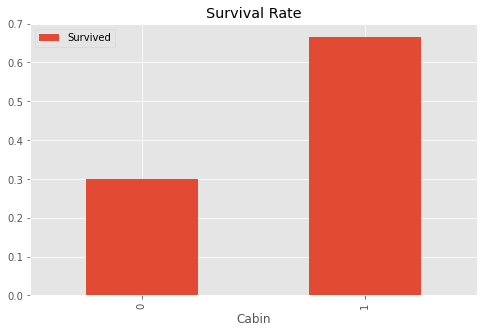

In [12]:
pd.pivot_table(full,index=['Cabin'],values=['Survived']).plot.bar(figsize=(8,5))
plt.title('Survival Rate')

__We can also plot the count of 'Cabin' to see some patterns.__

In [13]:
cabin=pd.crosstab(full.Cabin,full.Survived)
cabin.rename(index={0:'no cabin',1:'cabin'},columns={0.0:'Dead',1.0:'Survived'},inplace=True)
cabin

Survived,Dead,Survived
Cabin,,
no cabin,481,206
cabin,68,136


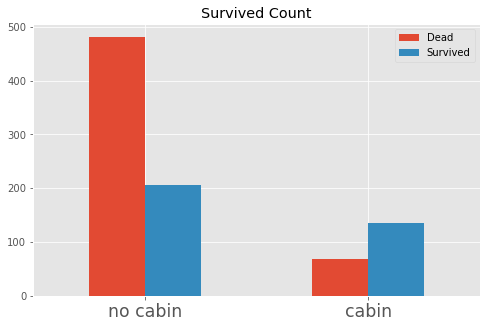

In [14]:
cabin.plot.bar(figsize=(8,5))
plt.xticks(rotation=0,size='xx-large')
plt.title('Survived Count')
plt.xlabel('')
plt.legend()

__From the plot, we can conclude that there is far more chance for a passenger to survive if we know his/her 'Cabin'.__

### Extract Title from 'Name'

In [15]:
full['Title']=full['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [16]:
full.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Major             2
Mlle              2
Sir               1
Don               1
Capt              1
Lady              1
the Countess      1
Jonkheer          1
Mme               1
Dona              1
Name: Title, dtype: int64

In [17]:
pd.crosstab(full.Title,full.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


__All the 'Title' belongs to one kind of gender except for 'Dr'.__

In [18]:
full[(full.Title=='Dr')&(full.Sex=='female')]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
796,49.0,1,S,25.9292,"Leader, Dr. Alice (Farnham)",0,797,1,female,0,1.0,17465,Dr


__So the PassengerId of the female 'Dr' is '797'. Then we map the 'Title'.__

In [19]:
nn={'Capt':'Rareman', 'Col':'Rareman','Don':'Rareman','Dona':'Rarewoman',
    'Dr':'Rareman','Jonkheer':'Rareman','Lady':'Rarewoman','Major':'Rareman',
    'Master':'Master','Miss':'Miss','Mlle':'Rarewoman','Mme':'Rarewoman',
    'Mr':'Mr','Mrs':'Mrs','Ms':'Rarewoman','Rev':'Mr','Sir':'Rareman',
    'the Countess':'Rarewoman'}

In [20]:
full.Title=full.Title.map(nn)

In [21]:
# assign the female 'Dr' to 'Rarewoman'
full.loc[full.PassengerId==797,'Title']='Rarewoman'

In [22]:
full.Title.value_counts()

Mr           765
Miss         260
Mrs          197
Master        61
Rareman       17
Rarewoman      9
Name: Title, dtype: int64

In [23]:
full[full.Title=='Master']['Sex'].value_counts()

male    61
Name: Sex, dtype: int64

In [24]:
full[full.Title=='Master']['Age'].describe()

count    53.000000
mean      5.482642
std       4.161554
min       0.330000
25%       2.000000
50%       4.000000
75%       9.000000
max      14.500000
Name: Age, dtype: float64

In [25]:
full[full.Title=='Miss']['Age'].describe()

count    210.000000
mean      21.774238
std       12.249077
min        0.170000
25%       15.000000
50%       22.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64

+ __'Master' mainly stands for little boy, but we also want to find little girl. Because children tend to have higher survival rate.__

+ __For the 'Miss' with a Age record, we can simply determine whether a 'Miss' is a little girl by her age.__

+ __For the 'Miss' with no Age record, we use (Parch!=0). Since if it's a little girl, she was very likely to be accompanied by parents.__

We'll create a function to filter the girls. The function can't be used if 'Age' is Nan, so first we fill the missing values with '999'.

In [26]:
full.Age.fillna(999,inplace=True)

In [27]:
def girl(aa):
    if (aa.Age!=999)&(aa.Title=='Miss')&(aa.Age<=14):
        return 'Girl'
    elif (aa.Age==999)&(aa.Title=='Miss')&(aa.Parch!=0):
        return 'Girl'
    else:
        return aa.Title

In [28]:
full['Title']=full.apply(girl,axis=1)

In [29]:
full.Title.value_counts()

Mr           765
Miss         201
Mrs          197
Master        61
Girl          59
Rareman       17
Rarewoman      9
Name: Title, dtype: int64

__Next we fill the missing 'Age' according to their 'Title'.__

In [30]:
full[full.Age==999]['Age'].value_counts()

999.0    263
Name: Age, dtype: int64

In [31]:
Tit=['Mr','Miss','Mrs','Master','Girl','Rareman','Rarewoman']
for i in Tit:
    full.loc[(full.Age==999)&(full.Title==i),'Age']=full.loc[full.Title==i,'Age'].median()

In [32]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          1309 non-null int64
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


### Finally, there is no missing value now!!!

# 数据探索

In [33]:
full.head(1400)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,1,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,1,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,34.5,0,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,Mr
1305,39.0,1,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,Rarewoman
1306,38.5,0,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,Mr
1307,34.5,0,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,Mr


__Let's first check whether the Age of each Title is reasonable.__

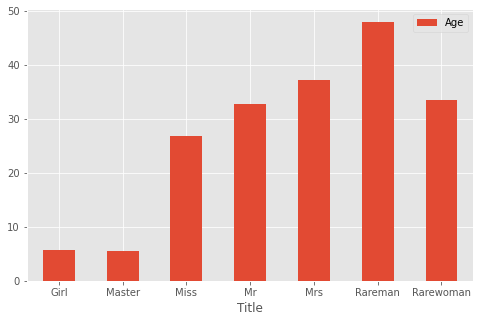

In [34]:
full.groupby(['Title'])[['Age','Title']].mean().plot(kind='bar',figsize=(8,5))
plt.xticks(rotation=0)
plt.show()

__As we can see, female has a much larger survival rate than male.__

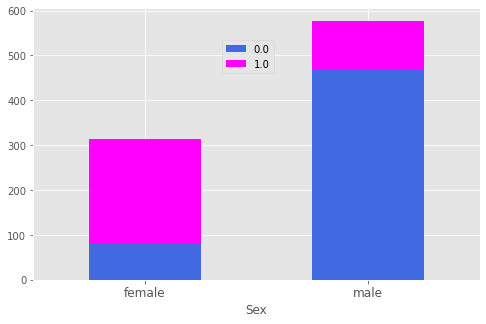

In [35]:
pd.crosstab(full.Sex,full.Survived).plot.bar(stacked=True,figsize=(8,5),color=['#4169E1','#FF00FF'])
plt.xticks(rotation=0,size='large')
plt.legend(bbox_to_anchor=(0.55,0.9))

__ We can also check the relationship between 'Age' and 'Survived'.__

In [36]:
agehist=pd.concat([full[full.Survived==1]['Age'],full[full.Survived==0]['Age']],axis=1)
agehist.columns=['Survived','Dead']
agehist.head()

,Survived,Dead
0,NaN,22.0
1,38.0,NaN
2,26.0,NaN
3,35.0,NaN
4,NaN,35.0


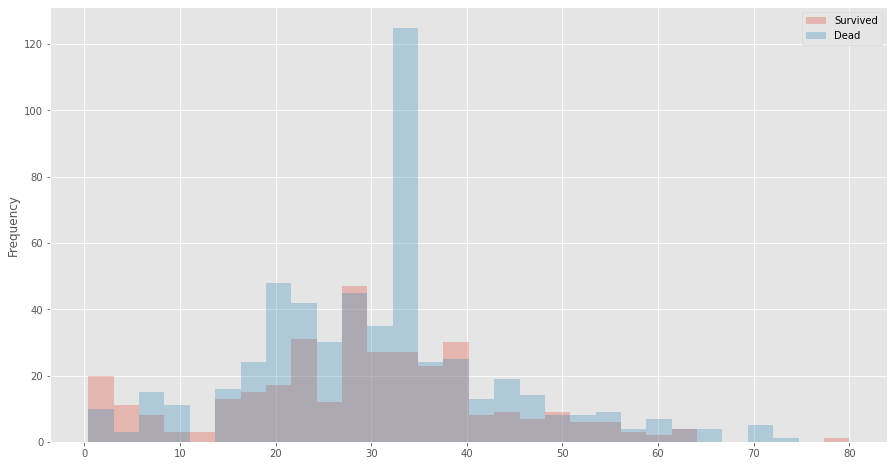

In [37]:
agehist.plot(kind='hist',bins=30,figsize=(15,8),alpha=0.3)

In [38]:
farehist=pd.concat([full[full.Survived==1]['Fare'],full[full.Survived==0]['Fare']],axis=1)
farehist.columns=['Survived','Dead']
farehist.head()

,Survived,Dead
0,NaN,7.25
1,71.2833,NaN
2,7.9250,NaN
3,53.1000,NaN
4,NaN,8.05


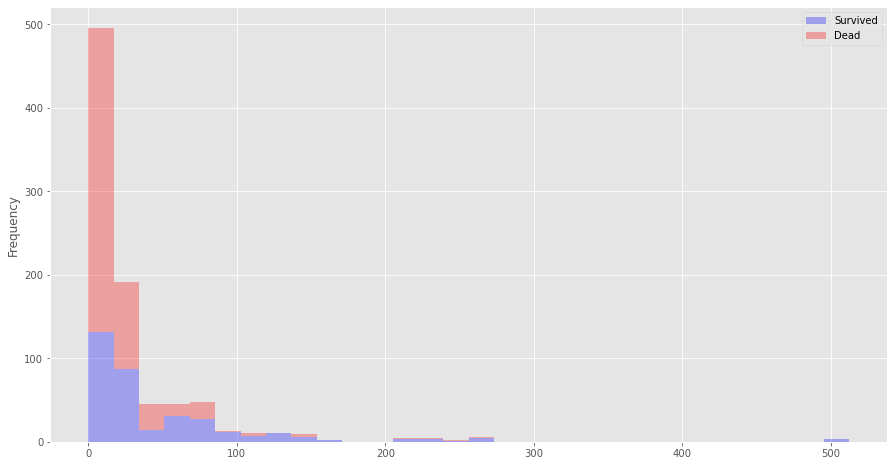

In [39]:
farehist.plot.hist(bins=30,figsize=(15,8),alpha=0.3,stacked=True,color=['blue','red'])

__People with high 'Fare' are more likely to survive, though most 'Fare' are under 100.__

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

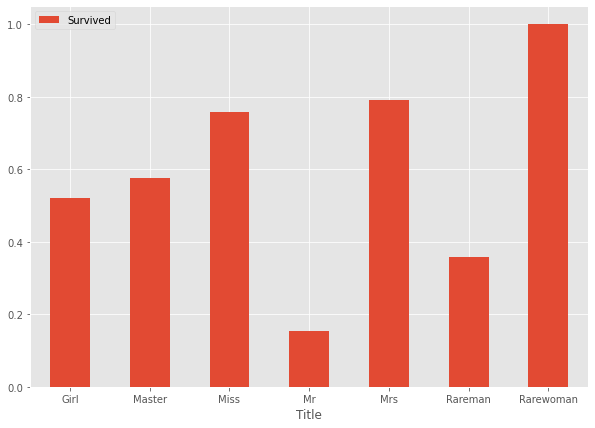

In [40]:
full.groupby(['Title'])[['Title','Survived']].mean().plot(kind='bar',figsize=(10,7))
plt.xticks(rotation=0)

__The 'Rarewoman' has 100% survival rate, that's amazing!!__

__It's natural to assume that 'Pclass' also plays a big part, as we can see from the plot below. The females in class 3 have a survival rate of about 50%, while survival rateof females from class1/2 are much higher.__

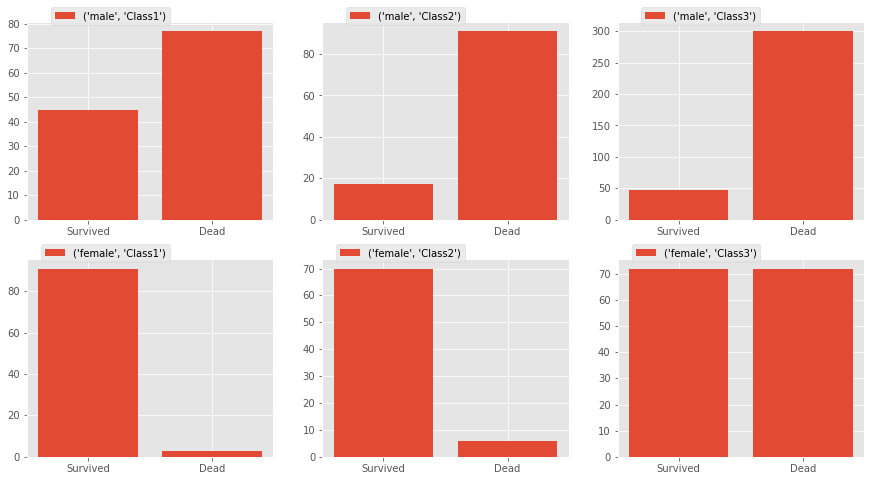

In [41]:
fig,axes=plt.subplots(2,3,figsize=(15,8))
Sex1=['male','female']
for i,ax in zip(Sex1,axes):
    for j,pp in zip(range(1,4),ax):
        PclassSex=full[(full.Sex==i)&(full.Pclass==j)]['Survived'].value_counts().sort_index(ascending=False)
        pp.bar(range(len(PclassSex)),PclassSex,label=(i,'Class'+str(j)))
        pp.set_xticks((0,1))
        pp.set_xticklabels(('Survived','Dead'))
        pp.legend(bbox_to_anchor=(0.6,1.1))

# 特征工程

In [42]:
# create age bands
full.AgeCut=pd.cut(full.Age,5)

<ipython-input-42-d99ed469a3af>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  full.AgeCut=pd.cut(full.Age,5)


In [43]:
# create fare bands
full.FareCut=pd.qcut(full.Fare,5)

<ipython-input-43-e4f24a49c74d>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  full.FareCut=pd.qcut(full.Fare,5)


In [44]:
full.AgeCut.value_counts().sort_index()

(0.0902, 16.136]    152
(16.136, 32.102]    564
(32.102, 48.068]    473
(48.068, 64.034]    107
(64.034, 80.0]       13
Name: Age, dtype: int64

In [45]:
full.FareCut.value_counts().sort_index()

(-0.001, 7.854]      275
(7.854, 10.5]        255
(10.5, 21.558]       255
(21.558, 41.579]     265
(41.579, 512.329]    259
Name: Fare, dtype: int64

In [46]:
# replace agebands with ordinals
full.loc[full.Age<=16.136,'AgeCut']=1
full.loc[(full.Age>16.136)&(full.Age<=32.102),'AgeCut']=2
full.loc[(full.Age>32.102)&(full.Age<=48.068),'AgeCut']=3
full.loc[(full.Age>48.068)&(full.Age<=64.034),'AgeCut']=4
full.loc[full.Age>64.034,'AgeCut']=5

In [47]:
full.loc[full.Fare<=7.854,'FareCut']=1
full.loc[(full.Fare>7.854)&(full.Fare<=10.5),'FareCut']=2
full.loc[(full.Fare>10.5)&(full.Fare<=21.558),'FareCut']=3
full.loc[(full.Fare>21.558)&(full.Fare<=41.579),'FareCut']=4
full.loc[full.Fare>41.579,'FareCut']=5

__We can see from the plot that 'FareCut' has a big impact on survial rate.__

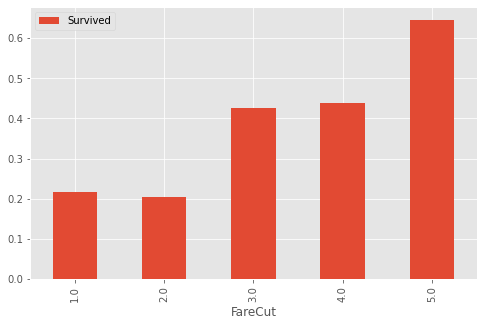

In [48]:
full[['FareCut','Survived']].groupby(['FareCut']).mean().plot.bar(figsize=(8,5))

In [49]:
full.corr()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,SibSp,Survived,AgeCut,FareCut
Age,1.000000,0.257126,0.153051,-0.161843,0.026528,-0.361790,-0.259798,-0.077692,0.939760,0.129070
Cabin,0.257126,1.000000,0.507352,0.036806,-0.000208,-0.713857,-0.009064,0.316912,0.234979,0.535707
Fare,0.153051,0.507352,1.000000,0.221668,0.031029,-0.558740,0.160388,0.257307,0.135191,0.603698
Parch,-0.161843,0.036806,0.221668,1.000000,0.008942,0.018322,0.373587,0.081629,-0.159184,0.337256
PassengerId,0.026528,-0.000208,0.031029,0.008942,1.000000,-0.038354,-0.055224,-0.005007,0.017900,-0.003346
Pclass,-0.361790,-0.713857,-0.558740,0.018322,-0.038354,1.000000,0.060832,-0.338481,-0.328087,-0.720881
SibSp,-0.259798,-0.009064,0.160388,0.373587,-0.055224,0.060832,1.000000,-0.035322,-0.256077,0.351834
Survived,-0.077692,0.316912,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000,-0.103700,0.318206
AgeCut,0.939760,0.234979,0.135191,-0.159184,0.017900,-0.328087,-0.256077,-0.103700,1.000000,0.091607
FareCut,0.129070,0.535707,0.603698,0.337256,-0.003346,-0.720881,0.351834,0.318206,0.091607,1.000000


__We haven't gererate any feature from 'Parch','Pclass','SibSp','Title', so let's do this by using pivot table.__

In [50]:
full[full.Survived.notnull()].pivot_table(index=['Title','Pclass'],values=['Survived']).sort_values('Survived',ascending=False)

Survived
Title     Pclass          
Rarewoman 2       1.000000
          1       1.000000
Master    1       1.000000
          2       1.000000
Girl      2       1.000000
Miss      1       0.977273
Mrs       1       0.976190
Miss      2       0.920000
Mrs       2       0.902439
Miss      3       0.552239
Mrs       3       0.500000
Girl      1       0.500000
Rareman   1       0.416667
Girl      3       0.400000
Master    3       0.392857
Mr        1       0.345794
          3       0.112853
          2       0.082474
Rareman   2       0.000000

In [51]:
full[full.Survived.notnull()].pivot_table(index=['Title','Parch'],values=['Survived']).sort_values('Survived',ascending=False)

Survived
Title     Parch          
Rarewoman 0      1.000000
Master    0      1.000000
Miss      1      0.875000
          2      0.857143
Mrs       0      0.855072
          1      0.812500
          2      0.769231
          3      0.750000
Girl      0      0.750000
Miss      0      0.736842
Girl      1      0.650000
Master    1      0.608696
          2      0.500000
Rareman   0      0.384615
Girl      2      0.363636
Mrs       5      0.250000
Mr        0      0.157447
          1      0.147059
          2      0.133333
          4      0.000000
          5      0.000000
Mrs       4      0.000000
          6      0.000000
Rareman   1      0.000000
Mr        3      0.000000

#### _From the pivot tables above, there is definitely a relationship among 'Survived','Title','Pclass','Parch'. So we can combine them together._

In [52]:
# only choose the object with not null 'Survived'.
TPP=full[full.Survived.notnull()].pivot_table(index=['Title','Pclass','Parch'],values=['Survived']).sort_values('Survived',ascending=False)
TPP

Survived
Title     Pclass Parch          
Rarewoman 2      0      1.000000
Master    3      0      1.000000
Mrs       1      1      1.000000
          2      2      1.000000
                 3      1.000000
Miss      2      2      1.000000
                 1      1.000000
          1      2      1.000000
Mrs       1      0      1.000000
Miss      1      1      1.000000
Girl      2      1      1.000000
Master    2      2      1.000000
                 1      1.000000
          1      2      1.000000
Rarewoman 1      0      1.000000
Girl      2      2      1.000000
Miss      1      0      0.966667
Mrs       2      1      0.909091
Miss      2      0      0.904762
Mrs       2      0      0.869565
Girl      3      0      0.750000
Mrs       3      2      0.666667
                 0      0.611111
Miss      3      0      0.571429
Girl      3      1      0.533333
Mrs       1      2      0.500000
          3      3      0.500000
Girl      1      2      0.500000
Rareman   1      0      0.454545
Mrs       3      1      0.444444
Master    3      1      0.437500
Mr        1      2      0.400000
                 0      0.352273
Miss      3      2      0.333333
Mr        1      1      0.307692
Master    3      2      0.272727
Mrs       3      5      0.250000
Girl      3      2      0.187500
Mr        3      0      0.118644
          2      0      0.091954
          3      1      0.071429
          1      4      0.000000
Miss      3      1      0.000000
Mr        2      2      0.000000
          3      5      0.000000
Mrs       3      4      0.000000
Mr        3      4      0.000000
Mrs       3      6      0.000000
Mr        3      3      0.000000
Rareman   1      1      0.000000
          2      0      0.000000
Mr        3      2      0.000000
          2      1      0.000000

Text(34, 0.54, '50% survival rate')

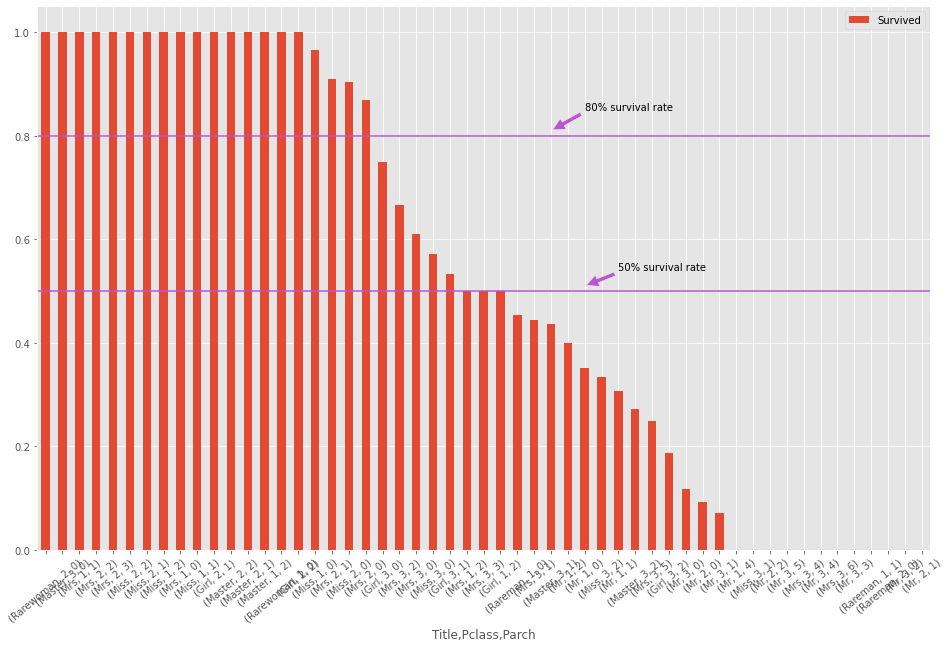

In [53]:
TPP.plot(kind='bar',figsize=(16,10))
plt.xticks(rotation=40)
plt.axhline(0.8,color='#BA55D3')
plt.axhline(0.5,color='#BA55D3')
plt.annotate('80% survival rate',xy=(30,0.81),xytext=(32,0.85),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))
plt.annotate('50% survival rate',xy=(32,0.51),xytext=(34,0.54),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))

__From the plot, we can draw some horizontal lines and make some classification. I only choose 80% and 50%, because I'm so afraid of overfitting.__

In [54]:
# use 'Title','Pclass','Parch' to generate feature 'TPP'.
Tit=['Girl','Master','Mr','Miss','Mrs','Rareman','Rarewoman']
for i in Tit:
    for j in range(1,4):
        for g in range(0,10):
            if full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g)&(full.Survived.notnull()),'Survived'].mean()>=0.8:
                full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g),'TPP']=1
            elif full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g)&(full.Survived.notnull()),'Survived'].mean()>=0.5:
                full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g),'TPP']=2
            elif full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g)&(full.Survived.notnull()),'Survived'].mean()>=0:
                full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g),'TPP']=3
            else: 
                full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g),'TPP']=4

+ __'TPP=1' means highest probability to survive, and 'TPP=3' means the lowest.__
+ __'TPP=4' means there is no such combination of (Title&Pclass&Pclass) in train set. Let's see what kind of combination it contains.__

In [55]:
full[full.TPP==4]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,AgeCut,FareCut,TPP
915,48.0,1,C,262.375,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",3,916,1,female,1,NaN,PC 17608,Mrs,3.0,5.0,4.0
960,60.0,1,S,263.000,"Fortune, Mrs. Mark (Mary McDougald)",4,961,1,female,1,NaN,19950,Mrs,4.0,5.0,4.0
979,33.0,0,Q,7.750,"O'Donoghue, Ms. Bridget",0,980,3,female,0,NaN,364856,Rarewoman,3.0,1.0,4.0
1011,12.0,0,S,15.750,"Watt, Miss. Bertha J",0,1012,2,female,0,NaN,C.A. 33595,Girl,1.0,3.0,4.0
1030,40.0,0,S,46.900,"Goodwin, Mr. Charles Frederick",6,1031,3,male,1,NaN,CA 2144,Mr,3.0,5.0,4.0
1033,61.0,1,C,262.375,"Ryerson, Mr. Arthur Larned",3,1034,1,male,1,NaN,PC 17608,Mr,4.0,5.0,4.0
1233,34.5,0,S,69.550,"Sage, Mr. John George",9,1234,3,male,1,NaN,CA. 2343,Mr,3.0,5.0,4.0
1256,39.0,0,S,69.550,"Sage, Mrs. John (Annie Bullen)",9,1257,3,female,1,NaN,CA. 2343,Mrs,3.0,5.0,4.0


__ We can simply classify them by 'Sex'&'Pclass'.__

In [56]:
full.ix[(full.TPP==4)&(full.Sex=='female')&(full.Pclass!=3),'TPP']=1
full.ix[(full.TPP==4)&(full.Sex=='female')&(full.Pclass==3),'TPP']=2
full.ix[(full.TPP==4)&(full.Sex=='male')&(full.Pclass!=3),'TPP']=2
full.ix[(full.TPP==4)&(full.Sex=='male')&(full.Pclass==3),'TPP']=3

<ipython-input-56-50deb871a9a0>:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  full.ix[(full.TPP==4)&(full.Sex=='female')&(full.Pclass!=3),'TPP']=1
<ipython-input-56-50deb871a9a0>:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  full.ix[(full.TPP==4)&(full.Sex=='female')&(full.Pclass==3),'TPP']=2
<ipython-input-56-50deb871a9a0>:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  full.ix[(full.TPP==4)&(full.Sex=='male')&(full.Pclass!=

In [57]:
full.TPP.value_counts()

3.0    870
1.0    262
2.0    177
Name: TPP, dtype: int64

In [58]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1309 non-null float64
Cabin          1309 non-null int64
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
AgeCut         1309 non-null float64
FareCut        1309 non-null float64
TPP            1309 non-null float64
dtypes: float64(6), int64(5), object(5)
memory usage: 163.8+ KB


# 模型与评估

In [59]:
predictors=['Cabin','Embarked','Parch','Pclass','Sex','SibSp','Title','AgeCut','TPP','FareCut','Age','Fare']

In [60]:
# convert categorical variables to numerical variables
full_dummies=pd.get_dummies(full[predictors])

In [61]:
full_dummies.head(1400)

,Cabin,Parch,Pclass,SibSp,AgeCut,TPP,FareCut,Age,Fare,Embarked_C,...,Embarked_S,Sex_female,Sex_male,Title_Girl,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rareman,Title_Rarewoman
0,0,0,3,1,2.0,3.0,1.0,22.0,7.2500,0,...,1,0,1,0,0,0,1,0,0,0
1,1,0,1,1,3.0,1.0,5.0,38.0,71.2833,1,...,0,1,0,0,0,0,0,1,0,0
2,0,0,3,0,2.0,2.0,2.0,26.0,7.9250,0,...,1,1,0,0,0,1,0,0,0,0
3,1,0,1,1,3.0,1.0,5.0,35.0,53.1000,0,...,1,1,0,0,0,0,0,1,0,0
4,0,0,3,0,3.0,3.0,2.0,35.0,8.0500,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,0,3,0,3.0,3.0,2.0,34.5,8.0500,0,...,1,0,1,0,0,0,1,0,0,0
1305,1,0,1,0,3.0,1.0,5.0,39.0,108.9000,1,...,0,1,0,0,0,0,0,0,0,1
1306,0,0,3,0,3.0,3.0,1.0,38.5,7.2500,0,...,1,0,1,0,0,0,1,0,0,0
1307,0,0,3,0,3.0,3.0,2.0,34.5,8.0500,0,...,1,0,1,0,0,0,1,0,0,0


__We choose 7 models and use 5-folds cross-calidation to evaluate these models.__

Models include:

+ k-Nearest Neighbors
+ Logistic Regression
+ Naive Bayes classifier
+ Decision Tree
+ Random Forrest
+ Gradient Boosting Decision Tree
+ Support Vector Machine

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [64]:
models=[KNeighborsClassifier(),LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),
       GradientBoostingClassifier(),SVC()]

In [65]:
full.shape,full_dummies.shape

((1309, 16), (1309, 21))

In [66]:
X=full_dummies[:891]
y=full.Survived[:891]
test_X=full_dummies[891:]

__As some algorithms such as KNN and SVM are sensitive to the scaling of the data, here we also apply standard-scaling to the data.__

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler=StandardScaler()
X_scaled=scaler.fit(X).transform(X)
test_X_scaled=scaler.fit(X).transform(test_X)
random_state=42
shuffle=True

In [69]:
# evaluate models by using cross-validation
names=['KNN','LR','NB','Tree','RF','GDBT','SVM']
for name, model in zip(names,models):
    score=cross_val_score(model,X,y,cv=10)
    print("{}:{},{}".format(name,score.mean(),score))

KNN:0.7385393258426965,[0.7        0.76404494 0.70786517 0.71910112 0.76404494 0.74157303
 0.76404494 0.71910112 0.71910112 0.78651685]


D:\APP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\APP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optim

LR:0.8293882646691635,[0.84444444 0.80898876 0.7752809  0.87640449 0.86516854 0.74157303
 0.85393258 0.80898876 0.87640449 0.84269663]
NB:0.8091885143570536,[0.82222222 0.84269663 0.76404494 0.86516854 0.78651685 0.7752809
 0.78651685 0.7752809  0.84269663 0.83146067]
Tree:0.8013732833957553,[0.77777778 0.88764045 0.71910112 0.7752809  0.80898876 0.85393258
 0.79775281 0.71910112 0.85393258 0.82022472]
RF:0.8081148564294631,[0.77777778 0.84269663 0.74157303 0.80898876 0.84269663 0.83146067
 0.7752809  0.7752809  0.86516854 0.82022472]
GDBT:0.838414481897628,[0.81111111 0.82022472 0.74157303 0.85393258 0.8988764  0.84269663
 0.83146067 0.80898876 0.91011236 0.86516854]
SVM:0.6824594257178527,[0.61111111 0.59550562 0.68539326 0.74157303 0.69662921 0.69662921
 0.69662921 0.69662921 0.71910112 0.68539326]


In [70]:
# used scaled data
names=['KNN','LR','NB','Tree','RF','GDBT','SVM']
for name, model in zip(names,models):
    score=cross_val_score(model,X_scaled,y,cv=10)
    print("{}:{},{}".format(name,score.mean(),score))

KNN:0.8114856429463172,[0.77777778 0.83146067 0.73033708 0.82022472 0.82022472 0.84269663
 0.82022472 0.79775281 0.84269663 0.83146067]
LR:0.8305118601747814,[0.84444444 0.80898876 0.76404494 0.87640449 0.86516854 0.76404494
 0.84269663 0.83146067 0.85393258 0.85393258]
NB:0.802521847690387,[0.75555556 0.7752809  0.7752809  0.84269663 0.84269663 0.7752809
 0.80898876 0.75280899 0.83146067 0.86516854]
Tree:0.8002621722846441,[0.76666667 0.84269663 0.74157303 0.78651685 0.80898876 0.85393258
 0.82022472 0.74157303 0.82022472 0.82022472]
RF:0.8024719101123594,[0.8        0.84269663 0.75280899 0.80898876 0.83146067 0.84269663
 0.7752809  0.73033708 0.82022472 0.82022472]
GDBT:0.838414481897628,[0.81111111 0.82022472 0.74157303 0.85393258 0.8988764  0.84269663
 0.83146067 0.80898876 0.91011236 0.86516854]
SVM:0.835043695380774,[0.81111111 0.84269663 0.7752809  0.87640449 0.87640449 0.84269663
 0.82022472 0.78651685 0.86516854 0.85393258]


In [71]:
model=GradientBoostingClassifier()

In [72]:
model.fit(X,y)

GradientBoostingClassifier()

In [73]:
model.feature_importances_

array([3.90619722e-02, 1.91089681e-03, 6.14022060e-03, 2.23567935e-02,
       4.16135589e-03, 6.40170509e-01, 3.69933562e-03, 8.72509553e-02,
       1.24861411e-01, 2.02049860e-03, 1.16975443e-04, 1.86929430e-02,
       1.94439859e-04, 4.55108843e-05, 9.96125674e-04, 1.09266841e-02,
       6.53161056e-04, 3.43728658e-02, 2.11558487e-03, 2.51761519e-04,
       0.00000000e+00])

In [74]:
X.columns

Index(['Cabin', 'Parch', 'Pclass', 'SibSp', 'AgeCut', 'TPP', 'FareCut', 'Age',
       'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'Sex_male', 'Title_Girl', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rareman', 'Title_Rarewoman'],
      dtype='object')

In [75]:
fi=pd.DataFrame({'importance':model.feature_importances_},index=X.columns)

In [76]:
fi.sort_values('importance',ascending=False)

,importance
TPP,0.640171
Fare,0.124861
Age,0.087251
Cabin,0.039062
Title_Mr,0.034373
SibSp,0.022357
Embarked_S,0.018693
Title_Master,0.010927
Pclass,0.006140
AgeCut,0.004161


Text(0.5, 1.0, 'Feature Importance')

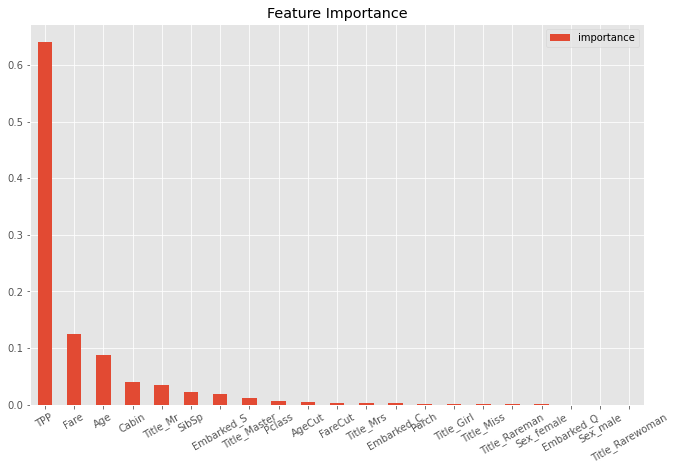

In [77]:
fi.sort_values('importance',ascending=False).plot.bar(figsize=(11,7))
plt.xticks(rotation=30)
plt.title('Feature Importance',size='x-large')

__Based on the bar plot, 'TPP','Fare','Age' are the most important.__

**Now let's think through this problem in another way. Our goal here is to improve the overall accuracy. This is equivalent to minimizing the misclassified observations. So if all the misclassified observations are found, maybe we can see the pattern and generate some new features.**

**Again we use cross-validation to search for the miscalssified observations**

In [78]:
from sklearn.model_selection import KFold

In [79]:
kf=KFold(n_splits=10,random_state=42,shuffle=True)

In [80]:
kf.get_n_splits(X)

10

In [81]:
print(kf)

KFold(n_splits=10, random_state=42, shuffle=True)


In [82]:
# extract the indices of misclassified observations
rr=[]
for train_index, val_index in kf.split(X):
    pred=model.fit(X.ix[train_index],y[train_index]).predict(X.ix[val_index])
    rr.append(y[val_index][pred!=y[val_index]].index.values)

<ipython-input-82-205a0163ac03>:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  pred=model.fit(X.ix[train_index],y[train_index]).predict(X.ix[val_index])
<ipython-input-82-205a0163ac03>:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  pred=model.fit(X.ix[train_index],y[train_index]).predict(X.ix[val_index])
<ipython-input-82-205a0163ac03>:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  pred=model.fit(X.ix[train_index],y[train_inde

In [83]:
rr

[array([ 23, 137, 141, 192, 204, 235, 254, 312, 357, 396, 447, 673, 767,
        772], dtype=int64),
 array([ 25,  49,  97, 139, 165, 209, 286, 338, 507, 512, 572, 578, 604,
        643, 712, 852, 854], dtype=int64),
 array([  2,  55,  79,  81, 199, 298, 390, 449, 483, 554, 660, 677, 762,
        804, 821], dtype=int64),
 array([ 18,  41, 140, 220, 248, 264, 328, 429, 444, 453, 547, 569, 587,
        664, 692, 816], dtype=int64),
 array([ 68,  74, 114, 177, 184, 271, 284, 431, 501, 543, 559, 570, 583,
        711, 828], dtype=int64),
 array([100, 107, 142, 169, 245, 261, 622, 740, 744, 745], dtype=int64),
 array([  8,  17,  36, 111, 127, 207, 226, 283, 301, 579, 630, 649, 679,
        737, 807, 839, 857], dtype=int64),
 array([146, 186, 233, 246, 267, 279, 297, 347, 400, 414, 415, 509, 550,
        607, 680, 855], dtype=int64),
 array([ 40,  85, 187, 216, 240, 251, 288, 391, 455, 460, 502, 553, 645,
        647, 654, 748, 838], dtype=int64),
 array([ 21, 106, 205, 252, 273, 276, 510, 5

In [84]:
# combine all the indices
whole_index=np.concatenate(rr)
len(whole_index)

148

In [85]:
full.ix[whole_index].head(1400)

<ipython-input-85-c4c832a65ca8>:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  full.ix[whole_index].head(1400)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,AgeCut,FareCut,TPP
23,28.0,1,S,35.5000,"Sloper, Mr. William Thompson",0,24,1,male,0,1.0,113788,Mr,2.0,4.0,3.0
137,37.0,1,S,53.1000,"Futrelle, Mr. Jacques Heath",0,138,1,male,1,0.0,113803,Mr,3.0,5.0,3.0
141,22.0,0,S,7.7500,"Nysten, Miss. Anna Sofia",0,142,3,female,0,1.0,347081,Miss,2.0,1.0,2.0
192,19.0,0,S,7.8542,"Andersen-Jensen, Miss. Carla Christine Nielsine",0,193,3,female,1,1.0,350046,Miss,2.0,2.0,2.0
204,18.0,0,S,8.0500,"Cohen, Mr. Gurshon ""Gus""",0,205,3,male,0,1.0,A/5 3540,Mr,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,29.0,0,Q,7.7500,"Daly, Mr. Eugene Patrick",0,511,3,male,0,1.0,382651,Mr,2.0,1.0,3.0
555,62.0,0,S,26.5500,"Wright, Mr. George",0,556,1,male,0,0.0,113807,Mr,4.0,4.0,3.0
681,27.0,1,C,76.7292,"Hassab, Mr. Hammad",0,682,1,male,0,1.0,PC 17572,Mr,2.0,5.0,3.0
729,25.0,0,S,7.9250,"Ilmakangas, Miss. Pieta Sofia",0,730,3,female,1,0.0,STON/O2. 3101271,Miss,2.0,2.0,2.0


In [86]:
diff=full.ix[whole_index]

<ipython-input-86-968c1d579ba9>:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  diff=full.ix[whole_index]


In [87]:
diff.describe()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,SibSp,Survived,AgeCut,FareCut,TPP
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.00000,148.000000
mean,31.837838,0.283784,31.450422,0.277027,404.466216,2.310811,0.378378,0.675676,2.500000,2.97973,2.608108
std,12.896661,0.452364,62.068402,0.698112,252.015884,0.902388,0.750559,0.469711,0.786796,1.34250,0.578940
min,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000
25%,24.000000,0.000000,7.925000,0.000000,198.250000,1.000000,0.000000,0.000000,2.000000,2.00000,2.000000
50%,31.000000,0.000000,15.245800,0.000000,391.500000,3.000000,0.000000,1.000000,2.000000,3.00000,3.000000
75%,37.000000,1.000000,30.000000,0.000000,625.000000,3.000000,1.000000,1.000000,3.000000,4.00000,3.000000
max,80.000000,1.000000,512.329200,5.000000,858.000000,3.000000,4.000000,1.000000,5.000000,5.00000,3.000000


In [88]:
diff.describe(include=['O'])

,Embarked,Name,Sex,Ticket,Title
count,148,148,148,148,148
unique,3,148,2,135,6
top,S,"Bing, Mr. Lee",male,1601,Mr
freq,108,1,89,6,82


In [89]:
# both mean and count of 'survived' should be considered.
diff.groupby(['Title'])['Survived'].agg([('average','mean'),('number','count')])

,average,number
Title,,
Girl,0.400000,5
Master,1.000000,2
Miss,0.333333,30
Mr,0.865854,82
Mrs,0.500000,24
Rareman,0.600000,5


In [90]:
diff.groupby(['Title','Pclass'])['Survived'].agg([('average','mean'),('number','count')])

average  number
Title   Pclass                  
Girl    1       0.000000       1
        3       0.500000       4
Master  3       1.000000       2
Miss    1       0.000000       1
        2       0.000000       2
        3       0.370370      27
Mr      1       0.729730      37
        2       1.000000       8
        3       0.972973      37
Mrs     2       0.000000       4
        3       0.600000      20
Rareman 1       0.600000       5

**It seems mainly the third class 'Miss'/'Mrs' and the first/third class 'Mr' are missclassified.**

In [91]:
diff.groupby(['Title','Pclass','Parch','SibSp'])['Survived'].agg([('average','mean'),('number','count')])

average  number
Title   Pclass Parch SibSp                  
Girl    1      2     1      0.000000       1
        3      1     0      0.000000       1
                     1      0.000000       1
               2     0      1.000000       1
                     4      1.000000       1
Master  3      2     0      1.000000       1
                     4      1.000000       1
Miss    1      0     0      0.000000       1
        2      0     0      0.000000       2
        3      0     0      0.363636      22
                     1      0.250000       4
               2     4      1.000000       1
Mr      1      0     0      0.720000      25
                     1      0.600000       5
               1     0      0.666667       3
                     1      1.000000       2
               2     0      1.000000       1
                     1      1.000000       1
        2      0     0      1.000000       7
                     1      1.000000       1
        3      0     0      0.969697      33
                     1      1.000000       2
                     2      1.000000       1
               1     1      1.000000       1
Mrs     2      0     0      0.000000       1
                     1      0.000000       2
               1     1      0.000000       1
        3      0     0      0.500000       2
                     1      0.555556       9
                     3      1.000000       1
               1     0      1.000000       1
                     1      0.666667       3
               2     0      0.333333       3
               5     1      1.000000       1
Rareman 1      0     0      1.000000       2
                     2      0.500000       2
               1     1      0.000000       1

Gererally, we should only pick the categories with relatively large numbers. That is:

__Then we add new feature 'MPPS'.__

In [92]:
full.loc[(full.Title=='Mr')&(full.Pclass==1)&(full.Parch==0)&((full.SibSp==0)|(full.SibSp==1)),'MPPS']=1
full.loc[(full.Title=='Mr')&(full.Pclass!=1)&(full.Parch==0)&(full.SibSp==0),'MPPS']=2
full.loc[(full.Title=='Miss')&(full.Pclass==3)&(full.Parch==0)&(full.SibSp==0),'MPPS']=3
full.MPPS.fillna(4,inplace=True)

In [93]:
full.MPPS.value_counts()

4.0    606
2.0    485
1.0    132
3.0     86
Name: MPPS, dtype: int64

From the __feature-Importance__ plot we can see the 'Fare' is the most important feature, let's explore whether we can generate some new feature.

In [94]:
diff[(diff.Title=='Mr')|(diff.Title=='Miss')].groupby(['Title','Survived','Pclass'])[['Fare']].describe().unstack()

Fare                                                          \
               count                  mean                               std   
Pclass             1    2     3          1          2          3           1   
Title Survived                                                                 
Miss  0.0        1.0  2.0  17.0  28.712500  13.000000   8.916671         NaN   
      1.0        NaN  NaN  10.0        NaN        NaN   8.467090         NaN   
Mr    0.0       10.0  NaN   1.0  39.087500        NaN  56.495800   17.689754   
      1.0       27.0  8.0  36.0  81.847844  14.107812  15.391664  127.081234   

                                              ...                           \
                                         min  ...       25%      50%         
Pclass                 2          3        1  ...         3        1     2   
Title Survived                                ...                            
Miss  0.0       0.000000   2.658174  28.7125  ...   7.75000  28.7125  13.0   
      1.0            NaN   1.553205      NaN  ...   7.75625      NaN   NaN   
Mr    0.0            NaN        NaN  26.0000  ...  56.49580  29.8500   NaN   
      1.0       4.963091  17.133150  26.2875  ...   7.77500  31.0000  13.0   

                                                                                
                              75%                           max                 
Pclass                3         1          2        3         1     2        3  
Title Survived                                                                  
Miss  0.0        7.7750  28.71250  13.000000   7.9250   28.7125  13.0  14.4583  
      1.0        7.8896       NaN        NaN   7.9250       NaN   NaN  12.4750  
Mr    0.0       56.4958  49.85625        NaN  56.4958   79.2000   NaN  56.4958  
      1.0        7.9250  76.72920  13.215625   9.5000  512.3292  26.0  56.4958  

[4 rows x 24 columns]

In [95]:
full[(full.Title=='Mr')|(full.Title=='Miss')].groupby(['Title','Survived','Pclass'])[['Fare']].describe().unstack()

Fare                                                 \
               count                     mean                         
Pclass             1     2      3           1          2          3   
Title Survived                                                        
Miss  0.0        1.0   2.0   30.0   28.712500  13.000000  11.637643   
      1.0       43.0  23.0   37.0  126.099126  17.611230   9.216559   
Mr    0.0       70.0  89.0  283.0   65.164104  19.651638  10.779237   
      1.0       37.0   8.0   36.0   73.464646  14.107812  15.391664   

                                                           ...          \
                       std                            min  ...     25%   
Pclass                   1          2          3        1  ...       3   
Title Survived                                             ...           
Miss  0.0              NaN   0.000000   8.512399  28.7125  ...  7.7750   
      1.0        92.270616  12.193091   4.004733  26.2833  ...  7.7500   
Mr    0.0        61.918723  15.857649   9.170363   0.0000  ...  7.7333   
      1.0       109.590302   4.963091  17.133150  26.2875  ...  7.7750   

                                                                       \
                    50%                       75%                       
Pclass                1     2       3           1          2        3   
Title Survived                                                          
Miss  0.0       28.7125  13.0  8.4000   28.712500  13.000000  10.3469   
      1.0       90.0000  13.0  7.7750  152.506250  17.429150   7.9250   
Mr    0.0       48.3021  13.0  7.8958   78.459375  26.000000   8.6625   
      1.0       35.5000  13.0  7.9250   76.729200  13.215625   9.5000   

                                         
                     max                 
Pclass                 1     2        3  
Title Survived                           
Miss  0.0        28.7125  13.0  46.9000  
      1.0       512.3292  65.0  24.1500  
Mr    0.0       263.0000  73.5  69.5500  
      1.0       512.3292  26.0  56.4958  

[4 rows x 24 columns]

But there seems no big difference between the 'Fare' of 'diff' and 'full'.

__Finally we could draw a corrlelation heatmap__

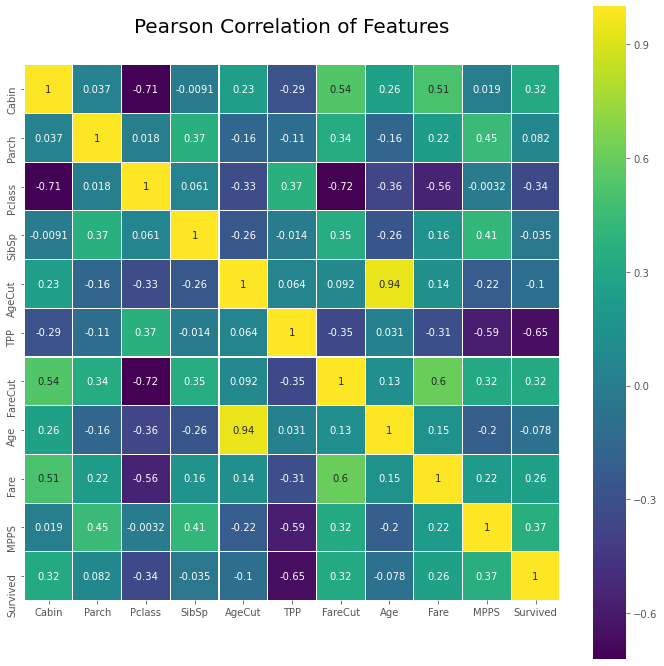

In [96]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(full[['Cabin','Parch','Pclass','SibSp','AgeCut','TPP','FareCut','Age','Fare','MPPS','Survived']].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# 参数调整

__Now let's do grid search for some algorithms. Since many algorithms performs better in scaled data, we will use scaled data.__

In [97]:
predictors=['Cabin','Embarked','Parch','Pclass','Sex','SibSp','Title','AgeCut','TPP','FareCut','Age','Fare','MPPS']
full_dummies=pd.get_dummies(full[predictors])
X=full_dummies[:891]
y=full.Survived[:891]
test_X=full_dummies[891:]

scaler=StandardScaler()
X_scaled=scaler.fit(X).transform(X)
test_X_scaled=scaler.fit(X).transform(test_X)

In [98]:
from sklearn.model_selection import GridSearchCV

### k-Nearest Neighbors

In [99]:
param_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13]}
grid_search=GridSearchCV(KNeighborsClassifier(),param_grid,cv=10)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'n_neighbors': 10}, 0.8327590511860175)

### Logistic Regression

In [100]:
param_grid={'C':[0.01,0.1,1,10]}
grid_search=GridSearchCV(LogisticRegression(),param_grid,cv=10)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'C': 0.1}, 0.8372534332084894)

In [101]:
# second round grid search
param_grid={'C':[0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15]}
grid_search=GridSearchCV(LogisticRegression(),param_grid,cv=10)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'C': 0.08}, 0.8372534332084894)

### Support Vector Machine

In [102]:
param_grid={'C':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}
grid_search=GridSearchCV(SVC(),param_grid,cv=10)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'C': 10, 'gamma': 0.01}, 0.8372908863920101)

In [103]:
#second round grid search
param_grid={'C':[2,4,6,8,10,12,13,14],'gamma':[0.008,0.01,0.012,0.015,0.02]}
grid_search=GridSearchCV(SVC(),param_grid,cv=10)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'C': 10, 'gamma': 0.012}, 0.839538077403246)

### Gradient Boosting Decision Tree

In [127]:
param_grid={'n_estimators':[30,50,80,120,200,250,300],'learning_rate':[0.005,0.05,0.1,0.5,1],'max_depth':[1,2,3,4,5]}
grid_search=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=10)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 120},
 0.842896379525593)

In [172]:
#second round search
param_grid={'n_estimators':[70,90,100,110,130,500],'learning_rate':[0.08,0.09,0.1,0.11,0.12,0.13],'max_depth':[2,3,4,5]}
grid_search=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=10)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'learning_rate': 0.08, 'max_depth': 3, 'n_estimators': 70},
 0.8451435705368289)

In [194]:
#third round search
param_grid={'n_estimators':[60,65,70,75,80,1000],'learning_rate':[0.07,0.073,0.075,0.077,0.079,0.08,0.081,0.083,0.085,0.087,0.089,0.09],'max_depth':[2,3,4,5]}
grid_search=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=10)

grid_search.fit(X_scaled,y)

grid_search.best_params_,grid_search.best_score_

({'learning_rate': 0.089, 'max_depth': 3, 'n_estimators': 65},
 0.8473782771535581)

# 集成方法

## Bagging

__We use logistic regression with the parameter we just tuned to apply bagging.__

In [273]:
from sklearn.ensemble import BaggingClassifier

In [274]:
bagging=BaggingClassifier(LogisticRegression(C=0.08),n_estimators=100)

## VotingClassifier

__We use five models to apply votingclassifier, namely logistic regression, random forest, gradient boosting decision,support vector machine and k-nearest neighbors.__

In [275]:
from sklearn.ensemble import VotingClassifier

In [276]:
clf1=LogisticRegression(C=0.08)
clf2=RandomForestClassifier(n_estimators=500)
clf3=GradientBoostingClassifier(n_estimators=65,learning_rate=0.089,max_depth=3)
clf4=SVC(C=10,gamma=0.012,probability=True)
clf5=KNeighborsClassifier(n_neighbors=10)

In [277]:
eclf_hard=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('GDBT',clf3),('SVM',clf4),('KNN',clf5)])

In [278]:
# add weights
eclfW_hard=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('GDBT',clf3),('SVM',clf4),('KNN',clf5)],weights=[1,1,2,3,1])

In [279]:
# soft voting
eclf_soft=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('GDBT',clf3),('SVM',clf4),('KNN',clf5)],voting='soft')

In [280]:
# add weights
eclfW_soft=VotingClassifier(estimators=[('LR',clf1),('RF',clf2),('GDBT',clf3),('SVM',clf4),('KNN',clf5)],voting='soft',weights=[1,1,2,3,1])

__Finally we can evaluate all the models we just used.__

In [281]:
models=[KNeighborsClassifier(n_neighbors=10),LogisticRegression(C=0.08),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=500),
        GradientBoostingClassifier(n_estimators=65,learning_rate=0.089,max_depth=3),SVC(C=10,gamma=0.012),
        eclf_hard,eclf_soft,eclfW_hard,eclfW_soft,bagging]

In [282]:
names=['KNN','LR','NB','CART','RF','GBT','SVM','VC_hard','VC_soft','VCW_hard','VCW_soft','Bagging']
for name,model in zip(names,models):
    score=cross_val_score(model,X_scaled,y,cv=10)
    print("{}: {},{}".format(name,score.mean(),score))

KNN: 0.8327590511860175,[0.84444444 0.85393258 0.75280899 0.82022472 0.87640449 0.86516854
 0.83146067 0.7752809  0.87640449 0.83146067]
LR: 0.8372534332084894,[0.84444444 0.84269663 0.76404494 0.87640449 0.87640449 0.7752809
 0.83146067 0.82022472 0.88764045 0.85393258]
NB: 0.8036454431960051,[0.75555556 0.7752809  0.7752809  0.84269663 0.83146067 0.79775281
 0.80898876 0.74157303 0.84269663 0.86516854]
CART: 0.7923845193508114,[0.77777778 0.86516854 0.70786517 0.75280899 0.79775281 0.86516854
 0.78651685 0.74157303 0.82022472 0.80898876]
RF: 0.8103495630461923,[0.78888889 0.85393258 0.75280899 0.80898876 0.85393258 0.84269663
 0.7752809  0.7752809  0.83146067 0.82022472]
GBT: 0.8473782771535581,[0.83333333 0.83146067 0.75280899 0.86516854 0.93258427 0.83146067
 0.85393258 0.80898876 0.91011236 0.85393258]
SVM: 0.839538077403246,[0.81111111 0.85393258 0.7752809  0.88764045 0.87640449 0.83146067
 0.83146067 0.78651685 0.87640449 0.86516854]
VC_hard: 0.8462671660424469,[0.82222222 0.842

## Stacking

__We use logistic regression, k-nearest neighbors, support vector machine, Gradient Boosting Decision Tree as first-level models, and use random forest as second-level model.__

In [263]:
from sklearn.model_selection import StratifiedKFold
n_train=train.shape[0]
n_test=test.shape[0]
kf=StratifiedKFold(n_splits=10,random_state=42,shuffle=True)  

In [264]:
def get_oof(clf,X,y,test_X):
    oof_train=np.zeros((n_train,))
    oof_test_mean=np.zeros((n_test,))
    oof_test_single=np.empty((10,n_test))
    for i, (train_index,val_index) in enumerate(kf.split(X,y)):
        kf_X_train=X[train_index]
        kf_y_train=y[train_index]
        kf_X_val=X[val_index]
        
        clf.fit(kf_X_train,kf_y_train)
        
        oof_train[val_index]=clf.predict(kf_X_val)
        oof_test_single[i,:]=clf.predict(test_X)
    oof_test_mean=oof_test_single.mean(axis=0)
    return oof_train.reshape(-1,1), oof_test_mean.reshape(-1,1)

In [265]:
LR_train,LR_test=get_oof(LogisticRegression(C=0.08),X_scaled,y,test_X_scaled)
KNN_train,KNN_test=get_oof(KNeighborsClassifier(n_neighbors=10),X_scaled,y,test_X_scaled)
SVM_train,SVM_test=get_oof(SVC(C=10,gamma=0.012),X_scaled,y,test_X_scaled)
GBDT_train,GBDT_test=get_oof(GradientBoostingClassifier(n_estimators=65,learning_rate=0.089,max_depth=3),X_scaled,y,test_X_scaled)

In [266]:
X_stack=np.concatenate((LR_train,KNN_train,SVM_train,GBDT_train),axis=1)
y_stack=y
X_test_stack=np.concatenate((LR_test,KNN_test,SVM_test,GBDT_test),axis=1)

In [267]:
X_stack.shape,y_stack.shape,X_test_stack.shape

((891, 4), (891,), (418, 4))

In [268]:
stack_score=cross_val_score(RandomForestClassifier(n_estimators=10),X_stack,y_stack,cv=10)

In [269]:
# cross-validation score of stacking
stack_score.mean(),stack_score

(0.8316853932584269,
 array([0.8       , 0.80898876, 0.76404494, 0.86516854, 0.85393258,
        0.79775281, 0.83146067, 0.83146067, 0.8988764 , 0.86516854]))

In [270]:
pred=RandomForestClassifier(n_estimators=500).fit(X_stack,y_stack).predict(X_test_stack)

In [271]:
tt=pd.DataFrame({'PassengerId':test.PassengerId,'Survived':pred})

In [272]:
tt.to_csv('test_out.csv',index=False)